In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.linalg import svd, orth, qr
from scipy.optimize import curve_fit
from numpy import sin, cos, pi
cmap = plt.cm.plasma

In [2]:
from initial_conditions import Domain, Polynom_Cm1, Polynom_C0, Polynom_C1, Polynom_C2, Polynom_C3, Polynom_C4, Polynom_C5
from basis_functions import SVD, Trigonometric, Trigonometric2, TrigonometricOdd, Greedy, LNA, LPF, Sinc, Fourier

In [3]:
page_width_pt = 455.24
pt2in = 0.01389 
pt2cm = 0.0352777778
cm2in = 1/2.54
plot_width_in = page_width_pt*pt2in/2
print(plot_width_in/cm2in)

plt.rcParams["figure.figsize"] = (plot_width_in, plot_width_in/1.61803398875)
plt.rcParams['font.size'] = 12
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
#mpl.rc('text', usetex=True)
mpl.rc('font', family='serif', size=12, serif='Computer Modern Roman')

8.030570172000001


In [4]:
VALIDATION = False  # includes SVD + numerical error computation

In [5]:
m, n, r = 2500, 2500, 2500
m, n, r = 1000, 1000, 1000
x = Domain([0, 1], m)
mu = Domain([0, 1], n)

In [6]:
results = np.zeros((6, 9, 4, r))
epsilon = 0.025
u_m1 = Polynom_Cm1()
u_0 = Polynom_C0()
u_1 = Polynom_C1()
u_2 = Polynom_C2()
u_3 = Polynom_C3()
u_4 = Polynom_C4()
u_5 = Polynom_C5()

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman


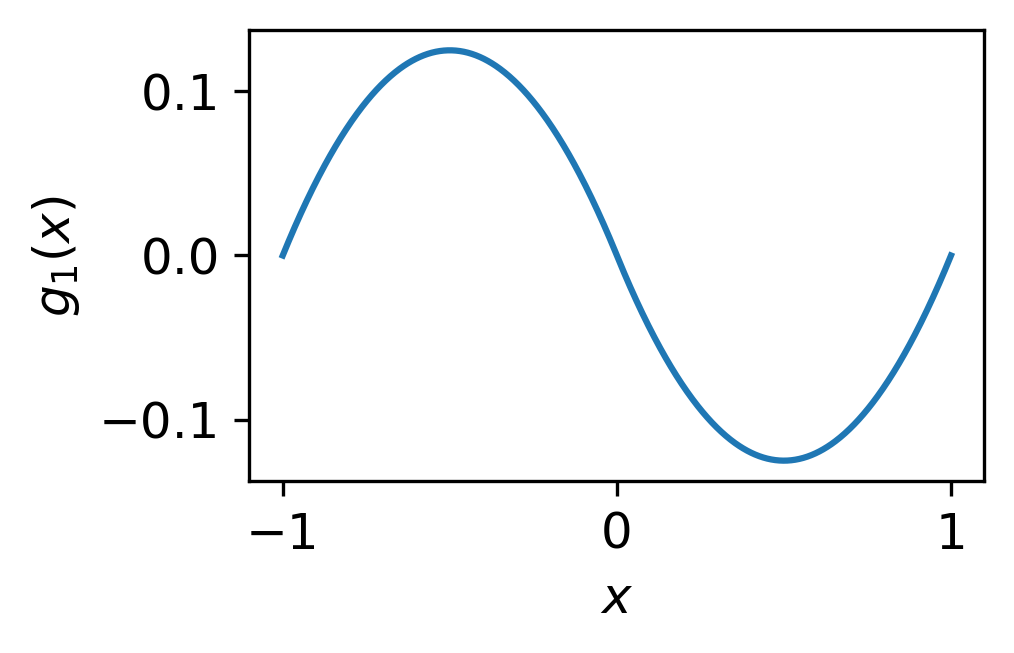

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman


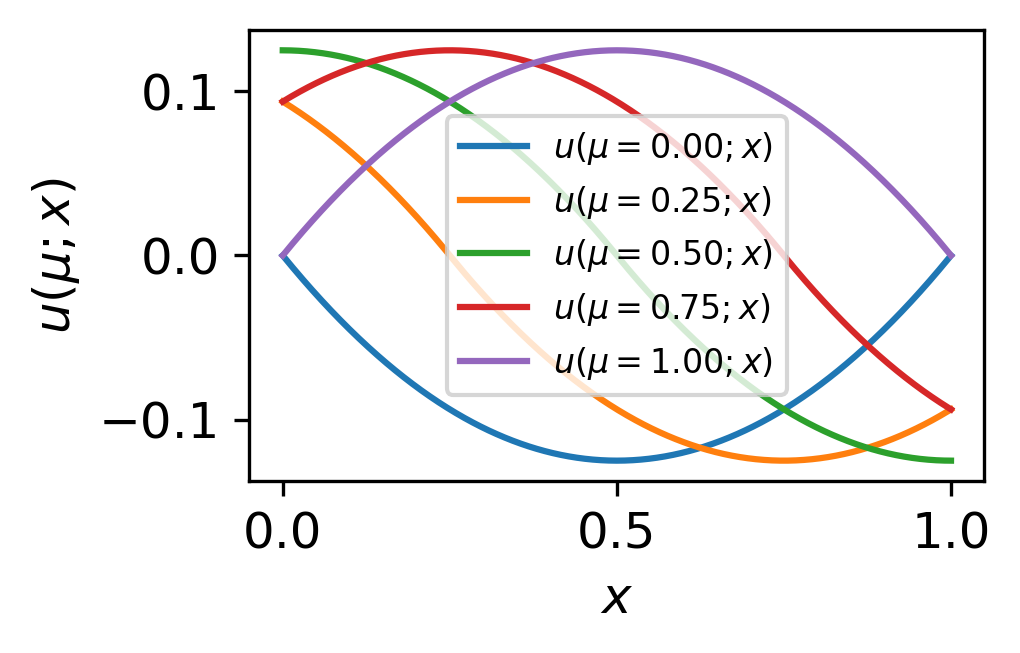

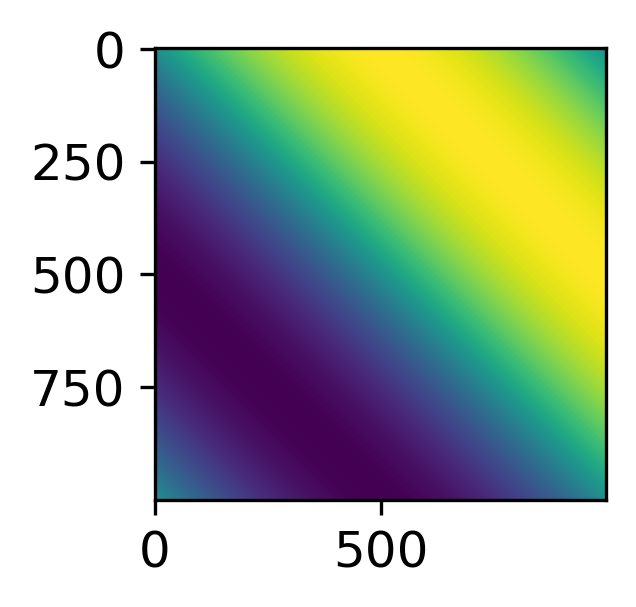

In [7]:
u_k = u_1

u_k.plot_q()
fig, ax = plt.subplots()
for mu_j in [0.0, 0.25, 0.5, 0.75, 1.0]:
    u_k.plot_u(mu_j, ax=ax, label=r'$u(\mu={:.2f}; x)$'.format(mu_j))
plt.legend(prop={'size': 8})
plt.show()

X = u_k(x(), mu())
plt.imshow(X)
np.save("C:/Users/florianma/OneDrive - Institutt for Energiteknikk/Documents/Repositories_local/test_scripts/X_test.npy", X)

In [8]:
trig_basis_odd = TrigonometricOdd(x())
fourier_basis = Fourier(x())

Omega max! 501 3147.8758388969727 3141.592653589793


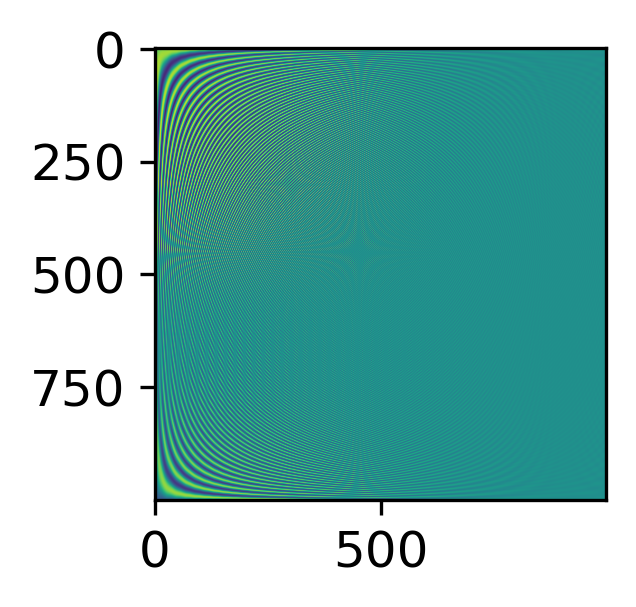

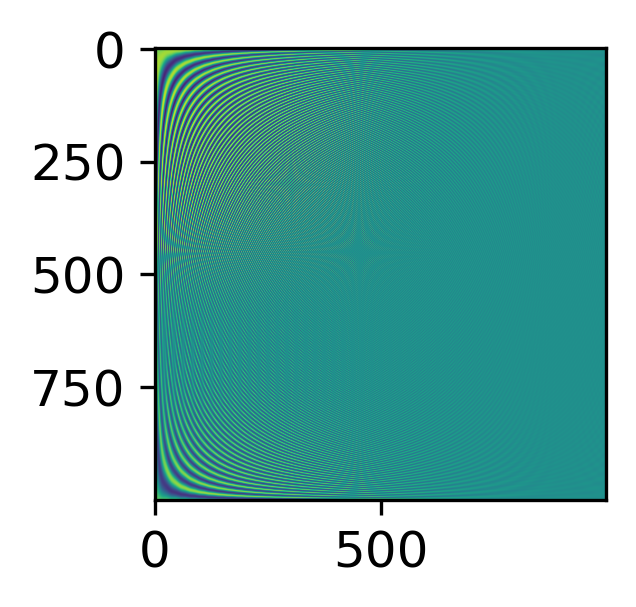

In [9]:
fig, ax = plt.subplots()
ax.imshow(trig_basis_odd.U)
plt.show()
fig, ax = plt.subplots()
ax.imshow(fourier_basis.U)
plt.show()

pth = "C:/Users/florianma/OneDrive - Institutt for Energiteknikk/Documents/Repositories_local/test_scripts/"
np.save(pth +"fourier_basis.npy", fourier_basis.U)
np.save(pth +"trig_basis_odd.npy", trig_basis_odd.U)

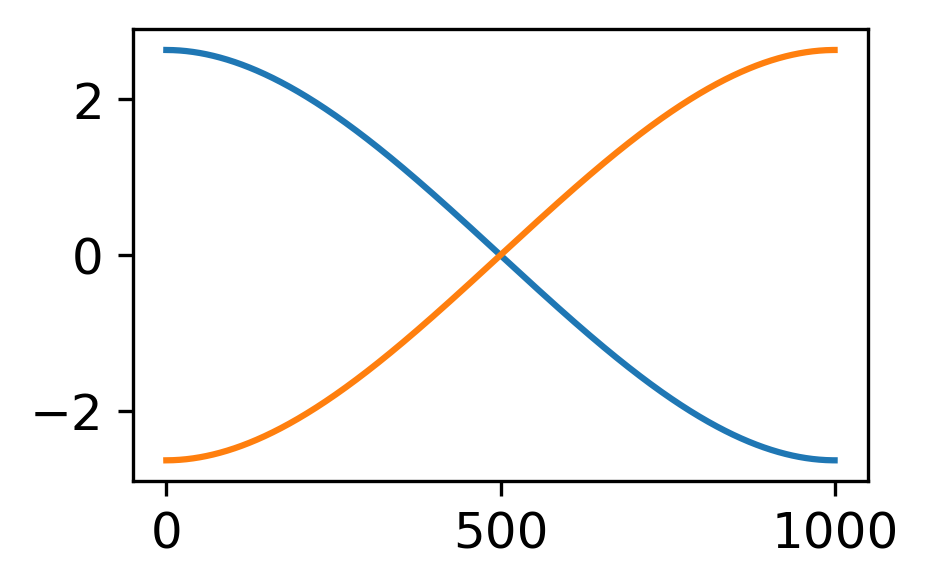

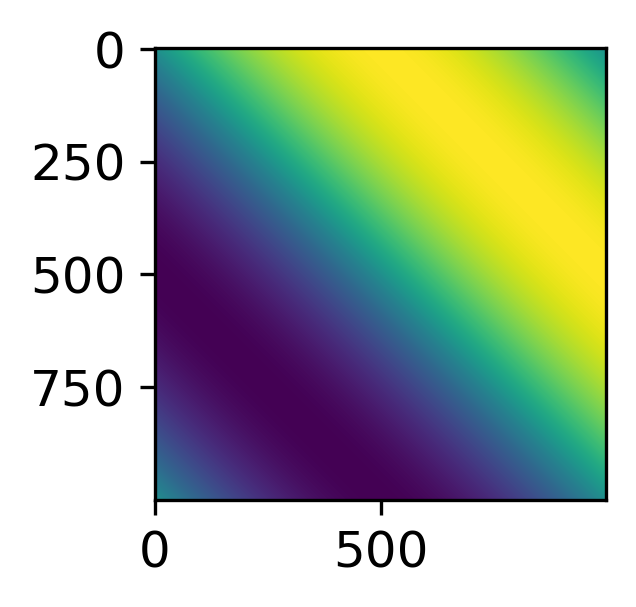

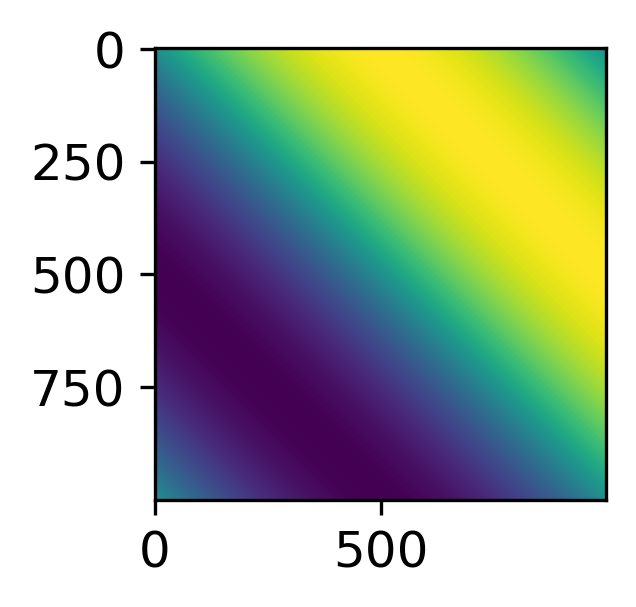

In [10]:
U = fourier_basis.U
#bias = np.ones_like(U[:, 0])
#U = np.c_[bias[:, None]/len(bias)**.5, U]
a0 = X.mean(axis=1)
VT = (U.T @ X)
plt.plot(a0*m**.5)
plt.plot(VT[0])
#plt.plot(VT[:, 0])
plt.show()
X_ = U @ VT
plt.imshow(X_)
plt.show()
plt.imshow(X)

In [11]:
initc = [u_m1, u_0, u_1, u_2, u_3, u_4, u_5]
results = np.zeros((3, 3, 7, r))  # 2 errors, 3 bv, 7 ic, r entries

for j, u_k in enumerate(initc):
    print(u_k.name)
    X = u_k(x(), mu())
    d_N, S = trig_basis_odd.calc_error_analytic(X)
    results[0, 0, j, :] = d_N[:r]
    if VALIDATION:
        svd_basis = SVD(X)

        # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # 
        u_k.plot_q()
        fig, ax = plt.subplots()
        for mu_j in [0.0, 0.25, 0.5, 0.75, 1.0]:
            u_k.plot_u(mu_j, ax=ax, label=r'$u(\mu={:.2f}; x)$'.format(mu_j))
        plt.legend(prop={'size': 8})
        plt.show()
        # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # 

        basis_all = [trig_basis_odd, svd_basis, fourier_basis]
        for i, basis in enumerate(basis_all):
            print(basis.name)
            d_N, S = basis.calc_error_analytic(X)
            results[0, i, j, :] = d_N[:r]
            delta_n, d_n = basis.calc_error(X, r)
            results[1, i, j, :] = d_ndelta_n
            results[2, i, j, :] = delta_n

        # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # 
        fig, ax = plt.subplots()
        for i, basis in enumerate(basis_all):
            ax.plot(results[0, i, j, :], ".", ms=1, label=basis.name)
            ax.plot(results[2, i, j, :], "k--", label=basis.name)
        ax.set_yscale('log')
        plt.legend(prop={'size': 8})
        plt.show()

        # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # 

$g_{-1}$
$g_0$
$g_1$
$g_2$
$g_3$
$g_4$
$g_5$


In [12]:
def L2(y, n):
    dy = np.diff(y.ravel(), n=n) * len(y)**n
    return np.mean(dy**2)**.5

C:\Users\florianma\AppData\Local\Temp\ipykernel_29336\2881132880.py:8: RuntimeWarning: divide by zero encountered in power
  d_upper = f_L2 * 2*(2*k+3)**.5 / np.pi**(k+2) * N**(-(k+1.5)) # Theorem 6.2 upper bound


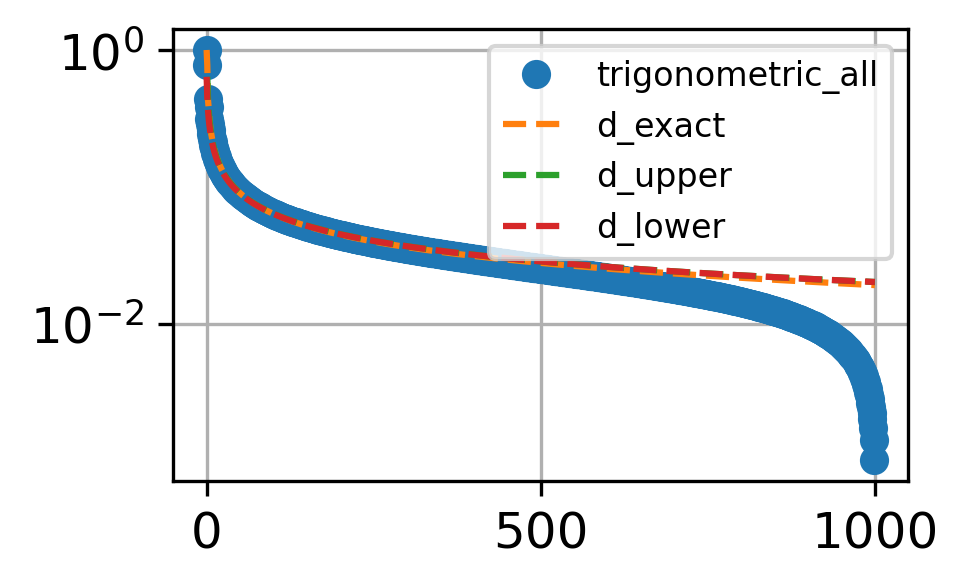

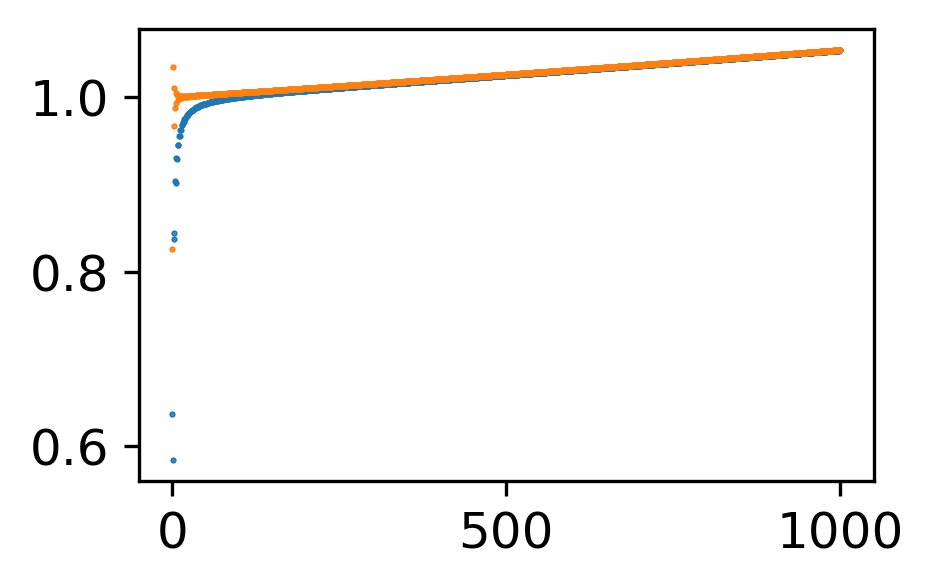

$g_{-1}$
1.0261769967867027
1.022473712200742
1.0261769967867027


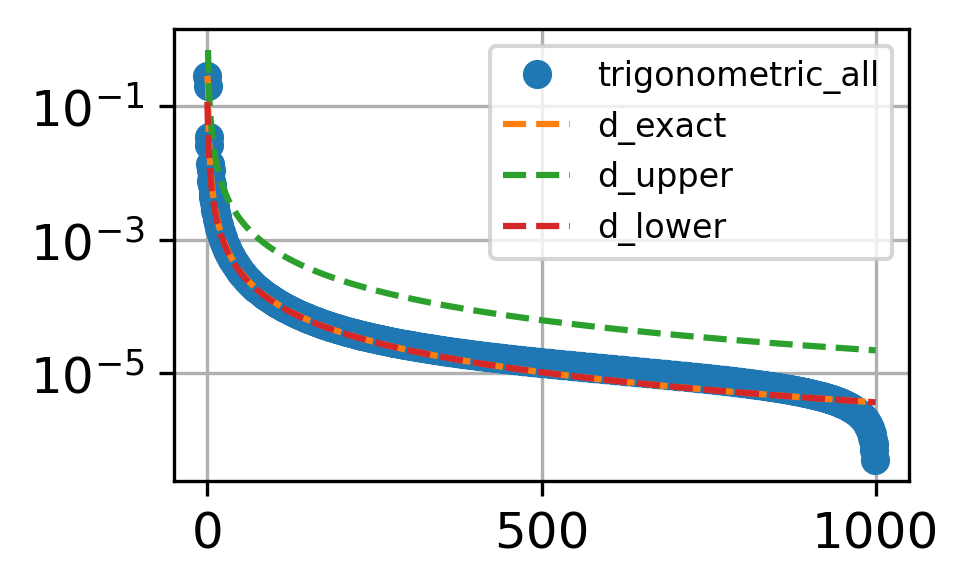

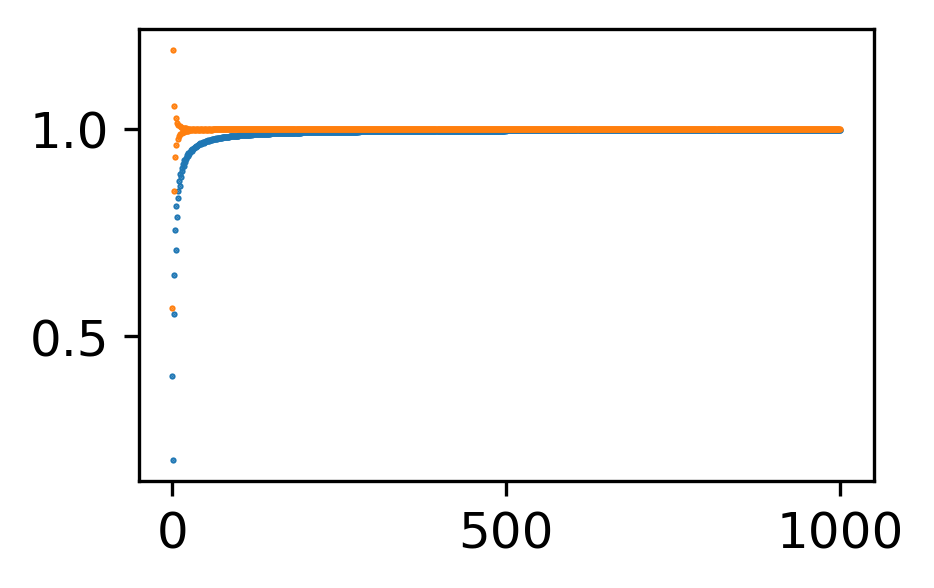

$g_0$
6.000992343057666
0.9898558205646986
0.9996656835652677


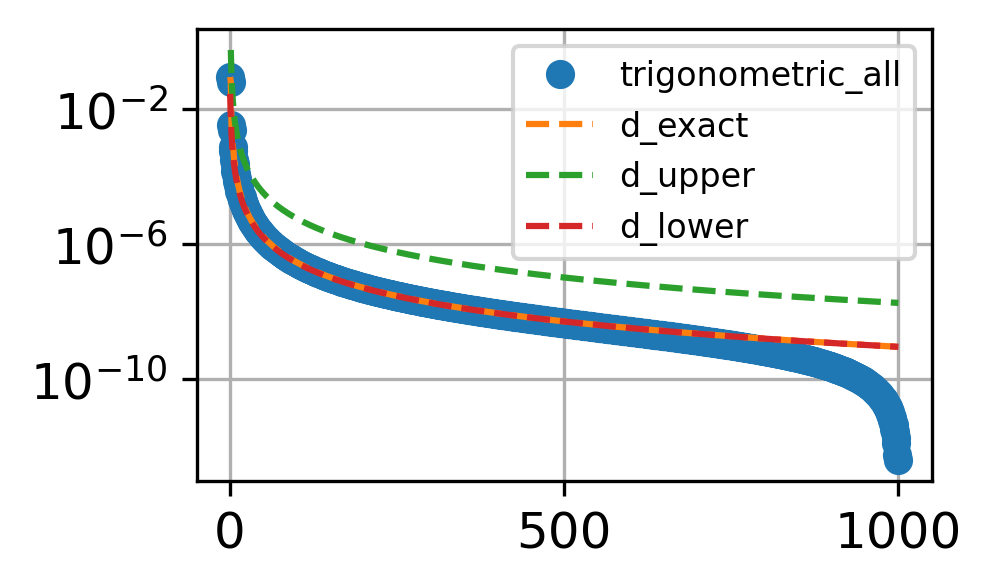

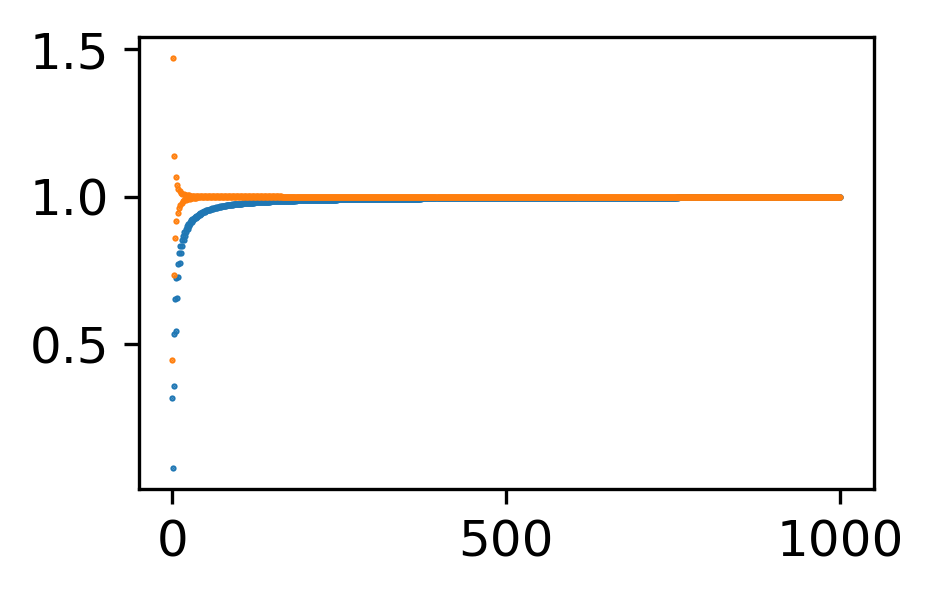

$g_1$
20.021505386601063
0.9840686871201884
0.9995123789407906


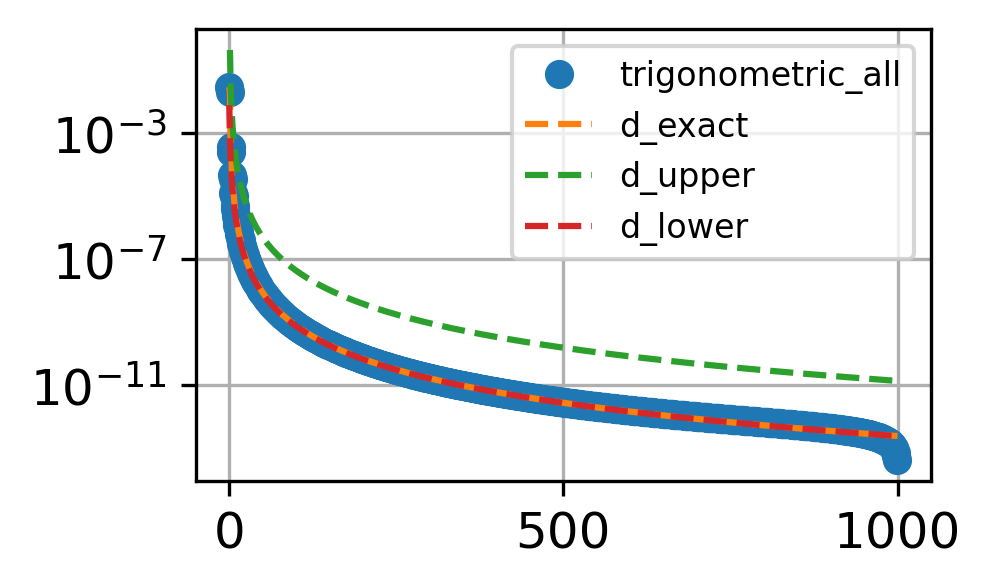

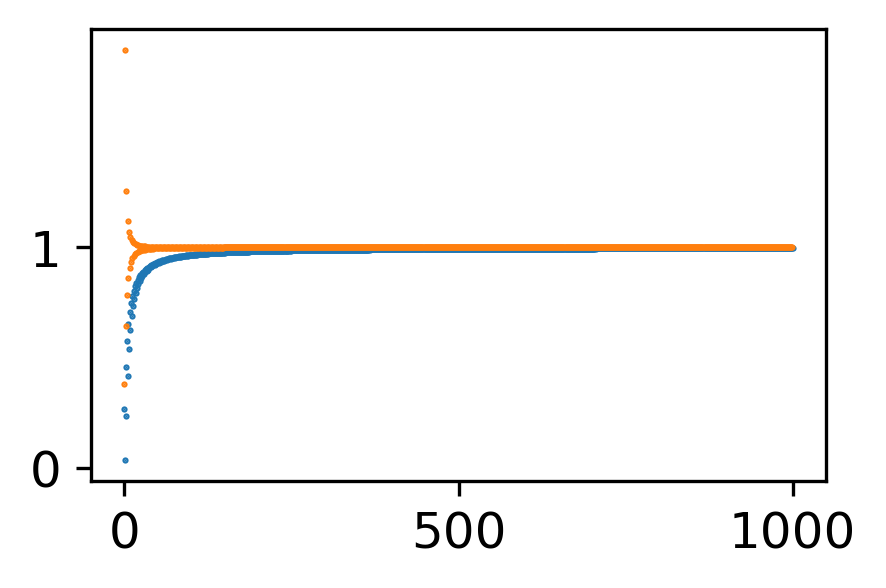

$g_2$
56.12083276222517
0.9788276201812799
0.9997376246004265


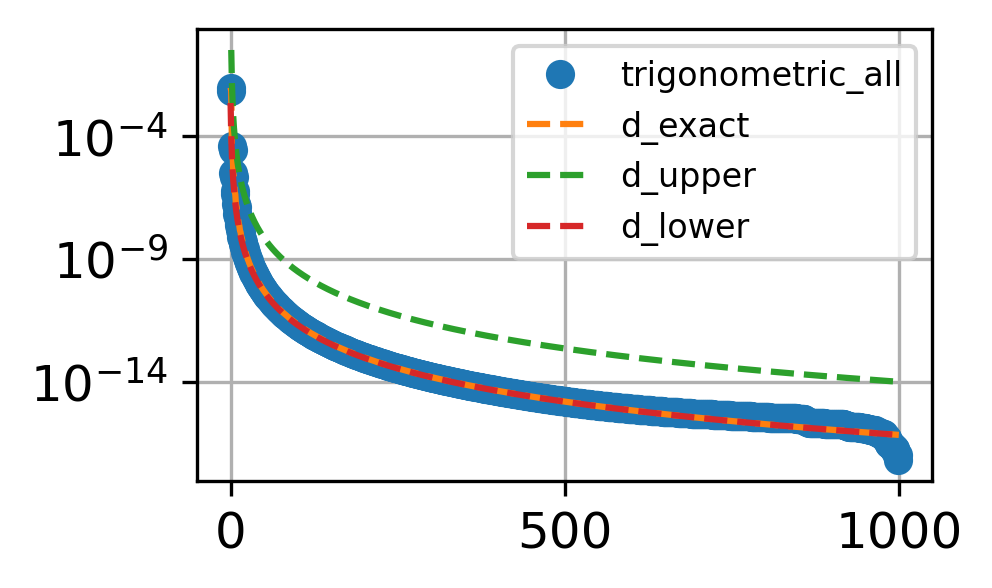

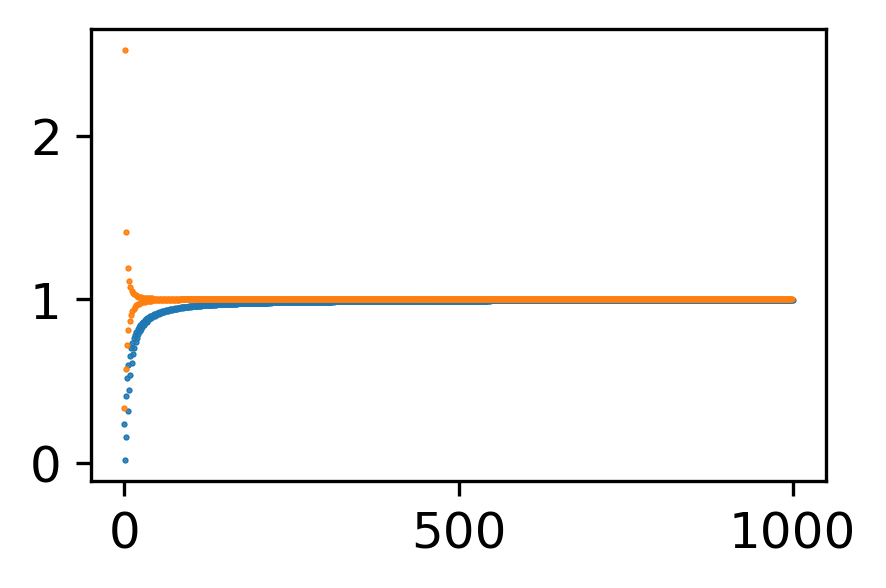

$g_3$
144.52155398287798
0.9738796719572234
1.0002680776918353


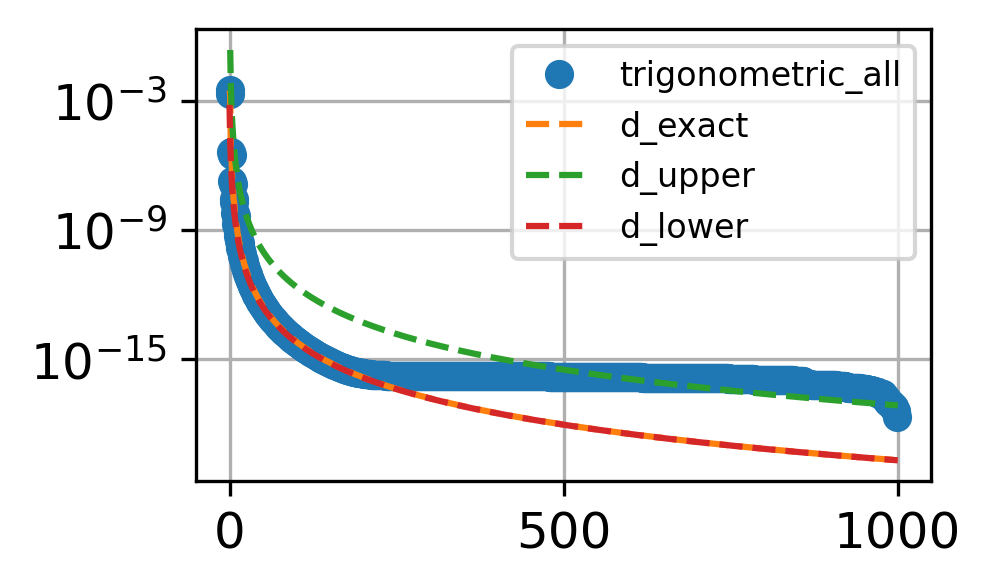

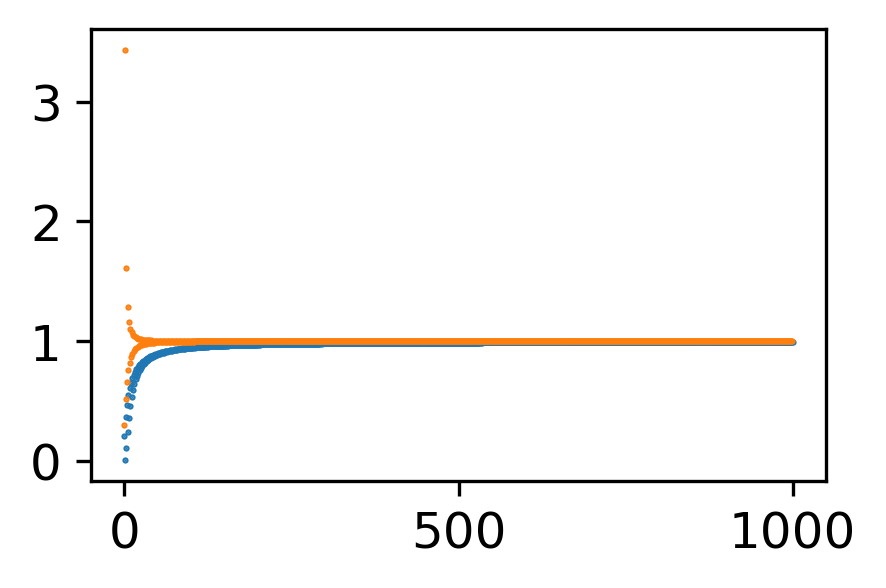

$g_4$
353.9243526924956
0.9691558656840528
1.0011874616096432


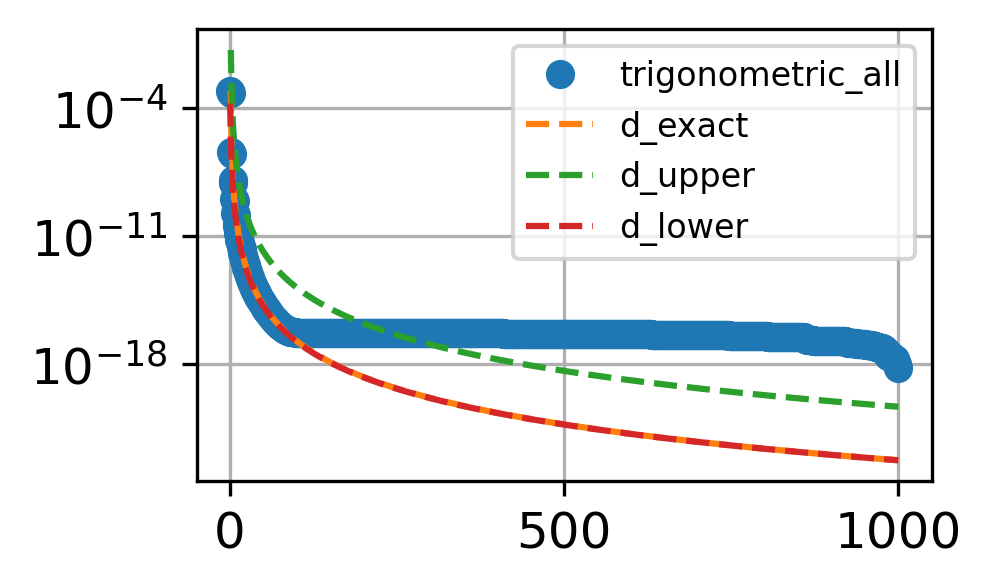

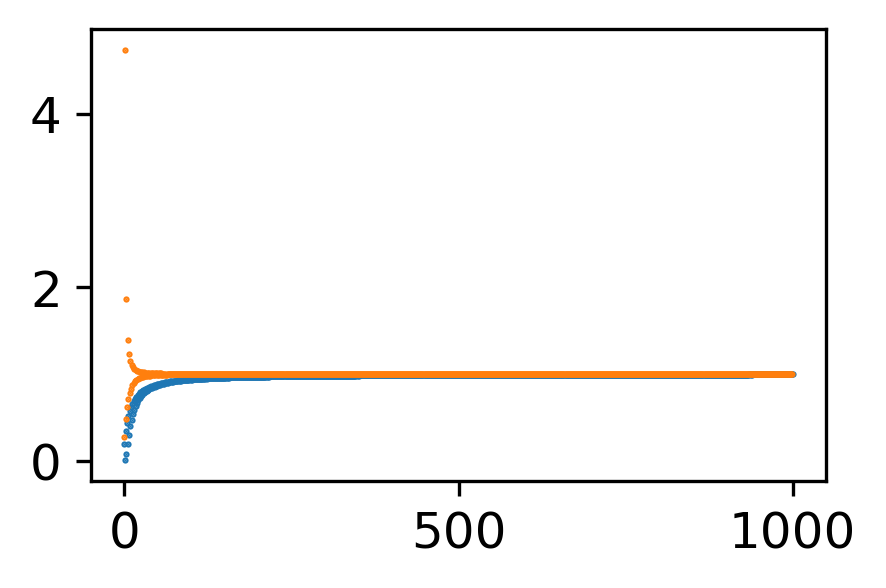

$g_5$
845.490924286373
0.9646141857910376
1.0026227113549333


In [13]:
Ninf = np.arange(1, 10000)
N = np.arange(r+1)
for j, u_k in enumerate(initc):
    k = j-1
    y = u_k.q(np.linspace(-1, 1, 1000))
    f_L2 = L2(y, k+1)
    d_exact = np.cumsum((4*(1/((2*np.floor((Ninf+1)/2)-1)*np.pi))**(2*k+4))[::-1])[::-1][N]**.5
    d_upper = f_L2 * 2*(2*k+3)**.5 / np.pi**(k+2) * N**(-(k+1.5)) # Theorem 6.2 upper bound
    d_lower = 2/(2*k+3)**.5 / np.pi**(k+2) * (N+1)**(-(k+1.5)) # Theorem 6.2 lower bound

    fig, ax = plt.subplots()
    #[svd_basis, trig_basis_odd, fourier_basis]
    if VALIDATION:
        ax.plot(results[0, 1, j, :], "-", label=svd_basis.name)
        ax.plot(results[0, 2, j, :], "--", label=fourier_basis.name)
    ax.plot(results[0, 0, j, :], "o", label=trig_basis_odd.name)
    ax.plot(d_exact, "--", label="d_exact")
    ax.plot(d_upper, "--", label="d_upper")
    ax.plot(d_lower, "--", label="d_lower")
    ax.set_yscale('log')
    plt.legend(prop={'size': 8})
    plt.grid()
    plt.show()

    fig, ax = plt.subplots()
#    plt.plot(d_upper/d_exact, ".")
    plt.plot(d_lower/d_exact, ".", ms=1)
    plt.plot(d_lower[:-1]/d_exact[1:], ".", ms=1)
    plt.show()
    print(u_k.name)
    print((d_upper/d_exact)[1:].mean())
    print((d_lower/d_exact).mean())
    print((d_lower[:-1]/d_exact[1:]).mean())


In [14]:
print(6**(1/2))
print(20**(1/3))
print(56**(1/4))
print(144**(1/5))
print(353**(1/6))
print(845**(1/7))

2.449489742783178
2.7144176165949063
2.7355647997347607
2.701920077041227
2.6584538015022856
2.6189209330889676


In [15]:
for k in range(6):
    print(np.e**(k+2))

7.3890560989306495
20.085536923187664
54.59815003314423
148.41315910257657
403.428793492735
1096.6331584284583
